# Fairness in Kidney Allocation🩺

ENGR-050 Project by Sasha Rabeno (Spring 2023)



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Interactive Mechanisms

This notebook uses a number of interactive features, called [widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html). These include simple things like buttons and sliders, but have the potential to become complex data visualization tools.

In [ ]:
my_button = widgets.RadioButtons(
    options=['Blood Type', 'Time on Waitlist', 'Expected LYFT', 'Overall Health', 'Health of Donor Kidney'],
#    value='none'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Pick which factor you''d like to weigh the most',
    disabled=False
)

display(my_button)

RadioButtons(description='Pick which factor youd like to weigh the most', options=('Blood Type', 'Time on Wait…

In [ ]:
print("You picked the following:")
print(my_button.value);

You picked the following:
Blood Type


There's fancier ways we can do this, but these are more just for show.

In [ ]:
widgets.Dropdown(
    options=[('Blood Type', 1), ('Time on Waitlist', 2), ('Expected LYFT', 3), ('Overall Health', 4), ('Health of Donor Kidney', 5)],
    value=2,
    description='Select option:',
)

Dropdown(description='Select option:', index=1, options=(('Blood Type', 1), ('Time on Waitlist', 2), ('Expecte…

One that I think both looks fancier and is also easy is the following button widget. It can execute a function call when the button is pressed.

# What's Our Narrative? 📚

One idea I have is to hone in on LYFT, since it seems there's more resources out there than I thought about LYFT as a metric.
https://onlinelibrary.wiley.com/doi/10.1111/j.1600-6143.2008.02177.x

The box plots for the above link show variations in LYFT by a variety of demographics (race, sex, blood type, insurance status, etc.)

I might also be able to look for disparities in who receives transplants. This is suggested by the following:
https://journals.lww.com/kidney360/Fulltext/2021/11000/Global_Perspective_on_Kidney_Transplantation_.20.aspx

> "Racial disparities in access to living donor kidney transplant have persisted, and worsened over the past two decades (5). In addition, although data on referrals are not systematically collected, available data suggest racial disparities also persist in referral and waitlisting (1)."

Futhermore,

> "As a result, wait times in the United States are getting longer, especially for those with O or B blood type..."

And again,

> "Greater than 50% of patients awaiting kidney transplantation in the United States are ethnic minorities with African Americans (AAs) constituting >33% of those on the waiting list." [source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5827936/)

[Percentages Source](https://www.sandiegobloodbank.org/what-most-common-blood-type)

[Demographics Source](https://www.medicalnewstoday.com/articles/most-common-blood-type-by-race#most-common-types)

&nbsp;
&nbsp;
<!--
## What can we do with this information?
I think we can look into how LYFT and other combination of weights affect the organ yield for different blood types. We can also use the simulation to explore who is left behind by our optimization model. The user's task can be to "correct" the model based on parameters we provide them (weighting with the four weights we already have, maybe changing those to blood type, etc.) to map to the "correct" distribution based on demographics in the U.S.. -->

---

&nbsp;
&nbsp;


###Development of a new policy

Since 2004, the KTC has considered more than 40 different scoring rules that involve various score components; see OPTNKTC (2010). We first discuss the criteria upon which the score components are based, and then discuss the components. For a patient p and an organ o, the criteria are:
1. Tissue matching or HLA matches, i.e., the number of
HLA shared by patient p and organ o;
2. Age of patient p and/or donor of organ o, denoted by
AGE(p) and AGE(o);
3. Wait time, which is equal to the number of years
patient p has been registered at the waitlist;
4. Dialysis time, which is equal to the years patient p
has spent on dialysis, denoted by DT4p5;
5. Blood group of patient and/or donor;
6. Expected posttransplant survival of patient p from
receiving organ o;
7. Expected waitlist survival of patient;
8. Life years from transplant, denoted by LYFT4p1 o5,
which is equal to the expected incremental quality-adjusted life-years gain of patient p from receiving organ o, compared to remaining on dialysis
9. Donor profile index, denoted by DPI(o), which is
a number between 0 and 1, indicating the quality of
the donated organ (0 corresponds to an organ of highest
quality);
10. Calculated panel reactive antibody, denoted by
CPRA(p), which is a number between 0 and 100, measuring the sensitization of the patient (0 corresponds to the lowest level).


A typical scoring rule proposed by the KTC includes
three to five score components that are functions of
(some of) the above criteria. In most cases, the components
are either linear functions (e.g., points are awarded per year
on dialysis, or per life-year from transplant, etc.), or nonlinear functions of one or more criteria.


In this notebook, we will be altering the weights for LYFT, DPI, DT, and CPRA.

How are LYFT value

LYFT values tend to be:
- greatest for patients with medium health (very sick patients and very healthy patients do not benefit much from the transplant)
- evenly distributed with respect to CPRA, patient type, and organ type
- decreasing with DPI
- decreasing with the mismatch between patient and organ type

## What's up with our current system?

Click the buttons below to see some facts about our current kidney allocation system.

In [ ]:
from IPython.display import display, Markdown, Image
layout = widgets.Layout(width='auto', height='40px') #set width and height
button1 = widgets.Button(description="Who is disadvantaged in receiving a kidney?", layout = layout)
output = widgets.Output()


display(button1, output)

def on_button_clicked_1(b):
    with output:
        print("Greater than 50% of patients awaiting kidney transplantation in the United States are ethnic minorities with African Americans constituting >33% of those on the waiting list.")
        display(Markdown('''[source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5827936/)'''))
        print("")

button1.on_click(on_button_clicked_1)


button2 = widgets.Button(description="How many transplants happen per year?", layout = layout)
output = widgets.Output()

print("")

display(button2, output)

def on_button_clicked_2(b):
    with output:
        print("Total kidney transplants exceeded 25,000 for the first year ever in the U.S.")
        display(Image(url='https://unos.org/wp-content/uploads/2022-data-composite-BLUE-padding-700x394-1.png'))
        display(Markdown('''[source](https://unos.org/news/2022-organ-transplants-again-set-annual-records/)'''))
        print("")

button2.on_click(on_button_clicked_2)

button3 = widgets.Button(description="Which blood types are most common in the U.S.?", layout = layout)
output = widgets.Output()

print("")

display(button3, output)

def on_button_clicked_3(b):
    with output:
        print("Here are the most common blood types in the U.S.")
        display(Markdown('''
| Blood Group | Percentage in US |
| ----------- | ----------- |
| O Positive (O +)	| 38 % |
| O Negative (O -)	| 7 % |
| A Positive (A +)	| 34 % |
| A Negative (A -)	| 6 % |
| B Positive (B +)	| 9 % |
| B Negative (B -)	| 2 % |
| AB Positive (AB +) |	3 % |
| AB Negative (AB -)	| 1 % |'''))
        print("")

button3.on_click(on_button_clicked_3)

print("")


button4 = widgets.Button(description="Which blood types are most common by race in the U.S.?", layout = layout)
output = widgets.Output()

# print("")

display(button4, output)

def on_button_clicked_4(b):
  with output:
      print("Here are the most common blood types by race in the U.S.")
      display(Markdown('''
* African American: 47% O-positive, 24% A-positive, and 18% B-positive
* Latin American: 53% O-positive, 29% A-positive, and 9% B-positive
* Asian: 39% O-positive, 27% A-positive, and 25% B-positive
* Caucasian: 37% O-positive, 33% A-positive, and 9% B-positive
    '''))
      print("")

button4.on_click(on_button_clicked_4)

Button(description='Who is disadvantaged in receiving a kidney?', layout=Layout(height='40px', width='auto'), …

Output()

Button(description='How many transplants happen per year?', layout=Layout(height='40px', width='auto'), style=…

Output()

Button(description='Which blood types are most common in the U.S.?', layout=Layout(height='40px', width='auto'…

Output()

Button(description='Which blood types are most common by race in the U.S.?', layout=Layout(height='40px', widt…

Output()

# The Simulation 👩‍💻

##***The simulation code below was written by Dr. Larry Snyder, Lehigh University, and modified by Sasha Rabeno.***

### For a patient p and an organ o, the criteria are:

**w_LYFT:** Life years from transplant, denoted by LYFT(p,o),
which is equal to the expected incremental quality-adjusted life-years gain of patient p from receiving organ o, compared to remaining on dialysis

**w_DT_DPI:** Donor profile index, denoted by DPI(p,o), which is
a number between 0 and 1, indicating the quality of
the donated organ (0 corresponds to an organ of highest
quality);

**w_DT:** Dialysis time, which is equal to the years patient p
has spent on dialysis, denoted by DT(p);

**w_CPRA:** Calculated panel reactive antibody, denoted by
CPRA(p), which is a number between 0 and 100, measuring the sensitization of the patient (0 corresponds to the
lowest level)


Using our metrics defined above, adjust the weights on the sliders depending on which factors YOU think should be weighted highest towards the LYFT. Click through the following code to find out how your LYFT compares to our simulation's.

In [ ]:
# w is a list: w = [w_LYFT, w_DT_DPI, w_DT, w_CPRA]

# KAS parameters for status quo (current proposal, as described by Bertsimas, et al. (2013), p. 77).
w_statusquo = [0.8, 0.8, 0.2, 0.04]

# KAS parameters for *your* weights.
# --- INSERT YOUR WEIGHTS HERE ---
w_mine = [0.4, 0.5, 0.1, 0.3]

#make sliders for lyft, dt_dpi, dt, and cpra
from IPython.display import display
from ipywidgets import interactive
weight_names = ["w_lyft", "w_dt_dpi", "w_dt", "w_cpra"]
# Define any function
def f(w_lyft, w_dt_dpi, w_dt, w_cpra):
    w_mine[0] = w_lyft
    w_mine[1] = w_dt_dpi
    w_mine[2] = w_dt
    w_mine[3] = w_cpra
    global the_current_value
    # the_current_value = w_lyft + w_dt_dpi + w_dt + w_cpra
    for i in range(4):
       print(weight_names[i] + ': ' + str(w_mine[i]))
    return w_mine

# Create sliders using interactive
my_result = interactive(f, w_lyft=(-2.0,2.0), w_dt_dpi=(-2.0,2.0), w_dt=(-2.0,2.0), w_cpra=(-2.0,2.0))

# You can also view this in a notebook without using display.
display(my_result)

interactive(children=(FloatSlider(value=0.0, description='w_lyft', max=2.0, min=-2.0), FloatSlider(value=0.0, …

In [ ]:
# This function calculates the LYFT for a given patient p
# and organ o. I made this function up; it has no basis in truth or reality.
def LYFT(p, o):
    # Score for the tissue match between organ and patient; between 0 and 1
    # (higher is better).
    match_score = 1.0 / (1 + abs(p['Type'] - o['Type']) ** (0.8 + p['CPRA'] / 50))

    # LYFT is greatest for patients with health 5 and decreases for patients
    # with better or worse health; it is greater if the DPI is smaller; and it
    # is greater if the match_score is greater.
    return 4 * (5.0 / (1 + abs(p['Health'] - 5))) * (1 - o['DPI']) * match_score

In [ ]:
# KAS function.
def KAS(w, p, o, current_clock):
    """
    w is a list: w = [w_LYFT, w_DT_DPI, w_DT, w_CPRA]
    """
    DT = (current_clock - p['Date']) / 365
    return w[0] * LYFT(p, o) * (1 - o['DPI']) + \
           w[1] * DT * o['DPI'] + \
           w[2] * DT + \
           w[3] * p['CPRA']

### Functions to generate random patients and organs 👨‍⚕️

In [ ]:
race_distribution = {"AA": 0.35, "H": 0.15, "C": 0.40, "O": 0.10}
blood_type_distribution = {"A": 0.30, "AB": 0.08, "B": 0.15, "O": 0.47}

def random_patient():
    p = {'CPRA': np.random.triangular(0, 40, 100),
         'Type': np.random.triangular(1, 3, 10),
         'Race': np.random.choice(list(race_distribution.keys()), p=list(race_distribution.values())),
         'BloodType': np.random.choice(list(blood_type_distribution.keys()), p=list(blood_type_distribution.values()))}
    # Generate health score: better for Caucasian than non-Caucasian patients.
    if p['Race'] == 'C':
        p['Health'] = np.random.triangular(1, 5, 10)
    else:
        p['Health'] = np.random.triangular(1, 3, 10)

    return p

def random_organ():
    o = {'DPI': np.random.rand(),
         'Type': np.random.triangular(1, 4, 10)}

    return o

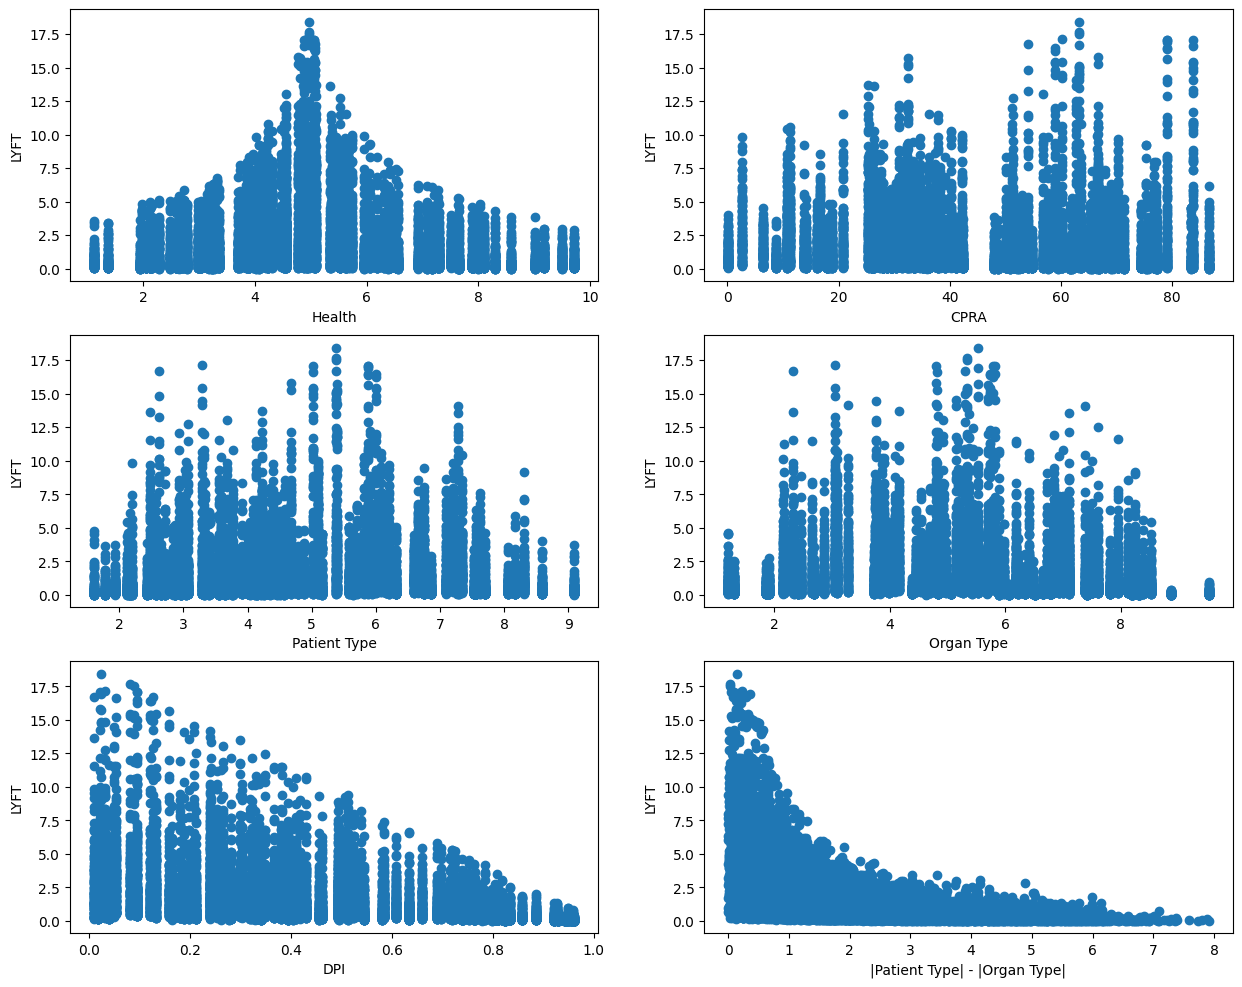

In [ ]:
# Calculate a bunch of random patients and organs, and visualize
# their LYFT scores.

patients = []
for i in range(100):
    p = random_patient()
    patients.append(p)

organs = []
for j in range(100):
    o = random_organ()
    organs.append(o)

LYFT_dict = {}
for i in range(len(patients)):
    for j in range(len(organs)):
        LYFT_dict[i, j] = LYFT(patients[i], organs[j])

po_pairs = [(i, j) for i in range(len(patients)) for j in range(len(organs))]
healths = [patients[i]['Health'] for (i, j) in po_pairs]
CPRAs = [patients[i]['CPRA'] for (i, j) in po_pairs]
p_types = [patients[i]['Type'] for (i, j) in po_pairs]
o_types = [organs[j]['Type'] for (i, j) in po_pairs]
matches = [abs(patients[i]['Type'] - organs[j]['Type']) for (i, j) in po_pairs]
DPIs = [organs[j]['DPI'] for (i, j) in po_pairs]
LYFTs = [LYFT_dict[i, j] for (i, j) in po_pairs]


fig=plt.figure(figsize=(15, 12))

plt.subplot(321)
plt.scatter(healths, LYFTs)
plt.xlabel('Health');
plt.ylabel('LYFT');

plt.subplot(322)
plt.scatter(CPRAs, LYFTs)
plt.xlabel('CPRA');
plt.ylabel('LYFT');

plt.subplot(323)
plt.scatter(p_types, LYFTs)
plt.xlabel('Patient Type');
plt.ylabel('LYFT');

plt.subplot(324)
plt.scatter(o_types, LYFTs)
plt.xlabel('Organ Type');
plt.ylabel('LYFT');

plt.subplot(325)
plt.scatter(DPIs, LYFTs)
plt.xlabel('DPI');
plt.ylabel('LYFT');

plt.subplot(326)
plt.scatter(matches, LYFTs)
plt.xlabel('|Patient Type| - |Organ Type|');
plt.ylabel('LYFT');


LYFT values tend to be:
- greatest for patients with medium health (very sick patients and very healthy patients do not benefit much from the transplant)
- evenly distributed with respect to CPRA, patient type, and organ type
- decreasing with DPI
- decreasing with the mismatch between patient and organ type

## Simulation 🖥️

### Simulation parameters.

In [ ]:
patient_interarrival = 1 # days/patient
organ_interarrival = 1.07 # days/organ
days_to_simulate = 1000
verbose = True

### Simulation function.

In [ ]:
def simulate(w, patient_interarrival, organ_interarrival, days_to_simulate, verbose, seed=None):
    """Simulate the system using the parameters provided.

    w is a list: w = [w_LYFT, w_DT_DPI, w_DT, w_CPRA]

    Returns
    -------
    time_stamps : list
        List of time stamps of events recorded in the other lists.
    list_sizes : list
        List of the wait-list sizes over time.
    total_LYFTs : list
        List of the cumulative LYFTs achieved over time.
    all_patients : list
        List of all patients generated during the simulation.
    all_organs : list
        List of all organs generated during the simulation.
    """

    # Intialize random number seed.
    np.random.seed(seed)

    # Internal trackers.
    clock = 0.0
    num_patients = 0
    num_organs = 0
    next_patient = np.random.exponential(patient_interarrival)
    next_organ = np.random.exponential(organ_interarrival)
    wait_list = []
    total_LYFT = 0.0

    # Outputs.
    time_stamps = []
    list_sizes = []
    total_LYFTs = []
    all_patients = []
    all_organs = []

    while clock < days_to_simulate:

        # Move to next event.
        if next_patient < next_organ:

            # Advance clock, update patient counter, and get next patient time.
            clock = next_patient
            num_patients += 1
            next_patient = clock + np.random.exponential(patient_interarrival)

            # Generate random patient and add to wait list.
            p = random_patient()
            p['Num'] = num_patients
            p['Date'] = clock
            wait_list.append(p)
            all_patients.append(p)

            # Record outputs.
            time_stamps.append(clock)
            list_sizes.append(len(wait_list))
            total_LYFTs.append(total_LYFT)

            # Print update.
            if verbose:
                print('{:12.4f}: patient {:6} arrival, {:6} on wait list'.format(clock, num_patients, len(wait_list)))

        else:

            # Advance clock, update organ counter, and get next organ time.
            clock = next_organ
            num_organs += 1
            next_organ = clock + np.random.exponential(organ_interarrival)

            # Generate random organ.
            o = random_organ()
            o['Date'] = clock
            all_organs.append(o)

            # If wait list is empty, do nothing.
            if len(wait_list) > 0:

                # Calculate KAS for each patient.
                KAS_list = [KAS(w, p, o, clock) for p in wait_list]

                # Sort in ascending order of KAS. (argsort() returns the arguments of
                # the sorted list.)
                KAS_sorted_args = np.argsort(KAS_list)

                # Give organ to first patient on list (remember that KAS_sorted_args is
                # in ascending order): remove patient from list and update LYFT.
                p = wait_list.pop(KAS_sorted_args[-1])
                total_LYFT += LYFT(p, o)

            else:

                p = {'Num': -1}

            # Record outputs.
            time_stamps.append(clock)
            list_sizes.append(len(wait_list))
            total_LYFTs.append(total_LYFT)

            # Print update.
            if verbose:
                print('{:12.4f}: organ {:6} arrival, given to patient {:6}, {:6} on wait list, total LYFT = {:12.2f}'.format(
                    clock, num_organs, p['Num'], len(wait_list), total_LYFT))

    return time_stamps, list_sizes, total_LYFTs, all_patients, all_organs

### Code to execute the simulation.
- Once with status quo weights.
- Once with your weights.

In [ ]:
# Use the same seed for both simulations (but the seed itself
# can be anything.)
seed = np.random.randint(1, 100)

# Simulate with status quo weights.
time_stamps_statusquo, list_sizes_statusquo, total_LYFTs_statusquo, all_patients, all_organs = \
    simulate(w_statusquo, patient_interarrival, organ_interarrival, days_to_simulate, verbose, seed=seed)

# Simulate with your weights.
time_stamps_mine, list_sizes_mine, total_LYFTs_mine, all_patients, all_organs = \
    simulate(w_mine, patient_interarrival, organ_interarrival, days_to_simulate, verbose, seed=seed)

      0.1222: patient      1 arrival,      1 on wait list
      0.2654: patient      2 arrival,      2 on wait list
      0.2948: patient      3 arrival,      3 on wait list
      1.0050: organ      1 arrival, given to patient      2,      2 on wait list, total LYFT =         0.14
      2.3096: patient      4 arrival,      3 on wait list
      3.0273: organ      2 arrival, given to patient      4,      2 on wait list, total LYFT =         6.26
      3.3529: organ      3 arrival, given to patient      1,      1 on wait list, total LYFT =         6.68
      4.0435: organ      4 arrival, given to patient      3,      0 on wait list, total LYFT =         6.98
      5.3994: patient      5 arrival,      1 on wait list
      5.5092: patient      6 arrival,      2 on wait list
      6.5002: patient      7 arrival,      3 on wait list
      6.6043: organ      5 arrival, given to patient      7,      2 on wait list, total LYFT =         8.79
      7.7910: organ      6 arrival, given to patient  

# Printing the Result 🖨️

Total LYFT, status quo weights: 3268.57
Total LYFT, your weights: 1974.14


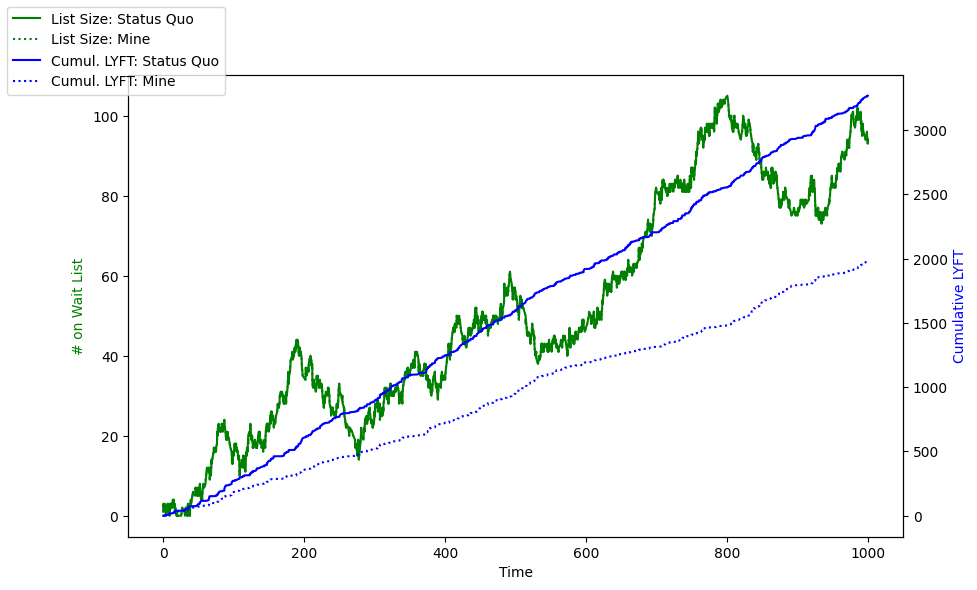

In [ ]:
# Print the results.
print("Total LYFT, status quo weights: {:.2f}".format(np.max(total_LYFTs_statusquo)))
print("Total LYFT, your weights: {:.2f}".format(np.max(total_LYFTs_mine)))

# Plot the results.
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(time_stamps_statusquo, list_sizes_statusquo, 'g-')
ax2.plot(time_stamps_statusquo, total_LYFTs_statusquo, 'b-')
ax1.plot(time_stamps_mine, list_sizes_mine, 'g:')
ax2.plot(time_stamps_mine, total_LYFTs_mine, 'b:')

ax1.set_xlabel('Time')
ax1.set_ylabel('# on Wait List', color='g')
ax2.set_ylabel('Cumulative LYFT', color='b')

fig.legend(['List Size: Status Quo', 'List Size: Mine', 'Cumul. LYFT: Status Quo', 'Cumul. LYFT: Mine'],
          loc='upper left')
plt.show()
fig.savefig('LYFT_plot.png', bbox_inches='tight')

- Green lines plot the list size over time. Note that both simulations result in exactly the same list-size line, because the weights don't affect *how many* people get organs, they only affect *who* gets the organ.
- Blue lines plot the cumulative LYFT attained over time. Status quo = solid line, your weights = dotted line.
- Your goal is to get your line to be above the status quo line.

# What's the status of things post-Bertsimas et al? 🤷

Bertsimas et al's article, which is the basis of most of this project, was published early 2013. However, there is some literature to suggest that discrepancies in the kidney allocation system have improved since then.
&nbsp;  

Melanson, Taylor A et al's 2017 paper [New Kidney Allocation System Associated With Increased Rates Of Transplants Among Black And Hispanic Patients](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5681858/) lives up to its name--the authors claim the following:

> "Prior to the 2014 implementation of a new kidney allocation system by the United Network for Organ Sharing, white patients were more likely to receive a kidney transplant than black or Hispanic patients...Implementation of the new system was associated with a narrowing of the disparity in the average monthly kidney transplantation rate by 0.29 percentage points for blacks compared to whites (p<0.001) and 0.24 percentage points for Hispanics compared to whites (p<0.001), resulting in both disparities becoming insignificant after implementation of the new system (p=0.45, p=0.18)."

This was achieved by examining 179,071 waitlisting events from the United Network for Organ Sharing database from June 2013 to September 2016 and calculated monthly kidney transplantation rates among waitlisted patients.
&nbsp;  
&nbsp;  

Another paper, Association of Racial Disparities With Access to Kidney Transplant After the Implementation of the New Kidney Allocation System, posits the following:
> "In this cohort study of 42,558 patients, racial disparities were reduced for most patients after implementation of the Kidney Allocation System. However, there continue to be significant racial/ethnic differences in transplant probability for patients who are highly sensitized." [(source)](https://jamanetwork.com/journals/jamasurgery/fullarticle/2729436)

If anything, these changes highlight the need for further work in the intersecting areas of optimization and social justice. Hopefully this project is a step in the right direction!